In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as tfl
import matplotlib.pyplot as plt
import os
import time
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

print(train_images.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)


In [ ]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images[:10000], train_labels[:10000]))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

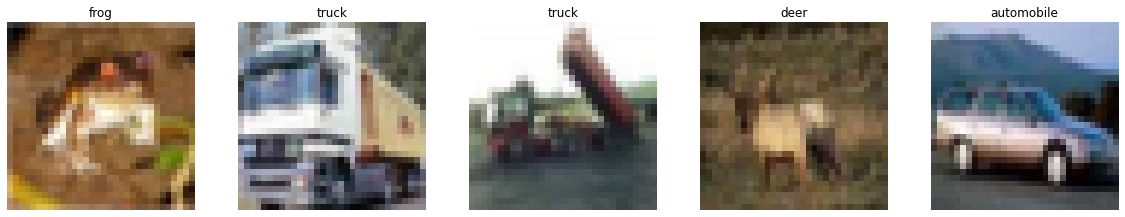

In [ ]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(train_ds.take(5)):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

In [ ]:
def process_images(image, label):
    image = tf.image.per_image_standardization(image)
    image = tf.image.resize(image, (227,227))
    return image, label

In [ ]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)

Training data size: 10000
Test data size: 10000


In [ ]:
train_ds = (train_ds.map(process_images).shuffle(buffer_size=train_ds_size).batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds.map(process_images).shuffle(buffer_size=train_ds_size).batch(batch_size=32, drop_remainder=True))

In [ ]:
AlexNet = tf.keras.Sequential([
    #Conv1
    tfl.Conv2D(96,11,strides=(4, 4),padding='valid', input_shape = (227,227,3)), 
    tfl.ReLU(),
    tfl.BatchNormalization(),
    tfl.MaxPool2D(pool_size = (3,3), strides = 2),
    #Conv2
    tfl.Conv2D(256,5,strides=(1, 1),padding='same'),
    tfl.ReLU(),
    tfl.BatchNormalization(),
    tfl.MaxPool2D(pool_size = (3,3), strides = 2),
    #Conv3
    tfl.Conv2D(384,3,strides=(1, 1),padding='same'),
    tfl.ReLU(),
    tfl.BatchNormalization(),
    #Conv4
    tfl.Conv2D(384,3,strides=(1, 1),padding='same'),
    tfl.ReLU(),
    tfl.BatchNormalization(),
    #Conv5
    tfl.Conv2D(256,3,strides=(1, 1),padding='same'),
    tfl.ReLU(),
    tfl.BatchNormalization(),
    tfl.MaxPool2D(pool_size = (3,3), strides = 2),
    #FC1
    tfl.Flatten(),
    tfl.Dense(4096, activation = 'relu'),
    tfl.Dropout(0.5),
    #FC2
    tfl.Dense(4096,activation = 'relu'),
    tfl.Dropout(0.5),
    #FC3
    tfl.Dense(10,activation = 'softmax')
    ])
AlexNet.compile( loss ='sparse_categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 re_lu (ReLU)                (None, 55, 55, 96)        0         
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 re_lu_1 (ReLU)              (None, 27, 27, 256)       0

In [ ]:
history = AlexNet.fit(train_ds,epochs = 10, batch_size = 64)

Epoch 1/10
312/312 [==============================] - 22s 56ms/step - loss: 0.1586 - accuracy: 0.9576
Epoch 2/10
312/312 [==============================] - 20s 55ms/step - loss: 0.1879 - accuracy: 0.9516
Epoch 3/10
312/312 [==============================] - 20s 55ms/step - loss: 0.1570 - accuracy: 0.9580
Epoch 4/10
312/312 [==============================] - 20s 55ms/step - loss: 0.1384 - accuracy: 0.9613
Epoch 5/10
312/312 [==============================] - 20s 55ms/step - loss: 0.1680 - accuracy: 0.9614
Epoch 6/10
312/312 [==============================] - 20s 55ms/step - loss: 0.1682 - accuracy: 0.9578
Epoch 7/10
312/312 [==============================] - 20s 55ms/step - loss: 0.1446 - accuracy: 0.9643
Epoch 8/10
312/312 [==============================] - 20s 55ms/step - loss: 0.1294 - accuracy: 0.9669
Epoch 9/10
312/312 [==============================] - 20s 55ms/step - loss: 0.1087 - accuracy: 0.9720
Epoch 10/10
312/312 [==============================] - 20s 55ms/step - loss: 0.118

In [ ]:
Results = AlexNet.evaluate(test_ds, batch_size=128)
print(Results)

312/312 [==============================] - 9s 20ms/step - loss: 1.5005 - accuracy: 0.7114
[1.5004923343658447, 0.7114382982254028]
